In [166]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

##  Loading Dataset

In [167]:
Train = pd.read_excel(r"C:\Users\Prince\OneDrive\Documents\Flight Prediction\Data_Train.xlsx") # train dataset



In [168]:
Train.head() # First 5 rows of Train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [169]:
Test.head() # First 5 rows of Test dataset

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [170]:
Train.shape # 10683 rows and 11 columns
Test.shape # 2671 rows and 10 colums

(2671, 12)

In [171]:
Train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Observations
our target variable Price is of Integer type and rest others are of object datatype
Route and Total_stops is having one null value

In [172]:
Train = Train.dropna(how='any',axis=0) # Dropping row with null values

In [173]:
Train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [174]:
Train.nunique() # checking number of unique values in each column

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

#### Observation
There are 12 Airlines
We have 5 sources
There is 6 different destination points
There are 10 different values in additional info

## EDA

In [175]:
Train["Journey_day"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [176]:
Train["Journey_month"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [177]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [178]:
Train.drop(["Date_of_Journey"], axis = 1, inplace = True) # we don't need this column now

In [179]:
# we need to do the same thing with departure time column
# Extracting hours
Train["Dep_hour"] = pd.to_datetime(Train["Dep_Time"]).dt.hour
# Extracting Minutes
Train["Dep_minutes"] = pd.to_datetime(Train["Dep_Time"]).dt.minute

Train.drop(["Dep_Time"], axis = 1, inplace = True) # we don't need this column now

In [180]:
Train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [181]:
# we need to do the same thing with Arrival_Time column
# Extracting hours
Train["Arrival_hour"] = pd.to_datetime(Train["Arrival_Time"]).dt.hour
# Extracting Minutes
Train["Arrival_min"] = pd.to_datetime(Train["Arrival_Time"]).dt.minute

Train.drop(["Arrival_Time"], axis = 1, inplace = True) # we don't need this column now

In [182]:
Train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [183]:
# Time taken by the flight to reach destination is called Duration
# it is a difference between  Departure and Arrival time

# assigning and converting Duration column into list
duration = list(Train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour
duration_hour = []
duration_mins = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # Extract only minutes from Duration

In [184]:
# Adding duration_hours and duration_mins list to Train dataframe

Train["Duration_hours"] = duration_hour
Train["Duration_mins"] = duration_mins

In [185]:
Train.drop(["Duration"], axis = 1, inplace = True) # we don't need this column now

In [186]:
Train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling categorical data
### 1. Nominal data: - data is not in any order :-> OneHotEncoder is used
### 2. Ordinal data: - data is in order:--> LabelEncoder is used

In [187]:
Train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [188]:
# as airline is nominal we will use onehot encoding

Airline = Train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [189]:
Train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

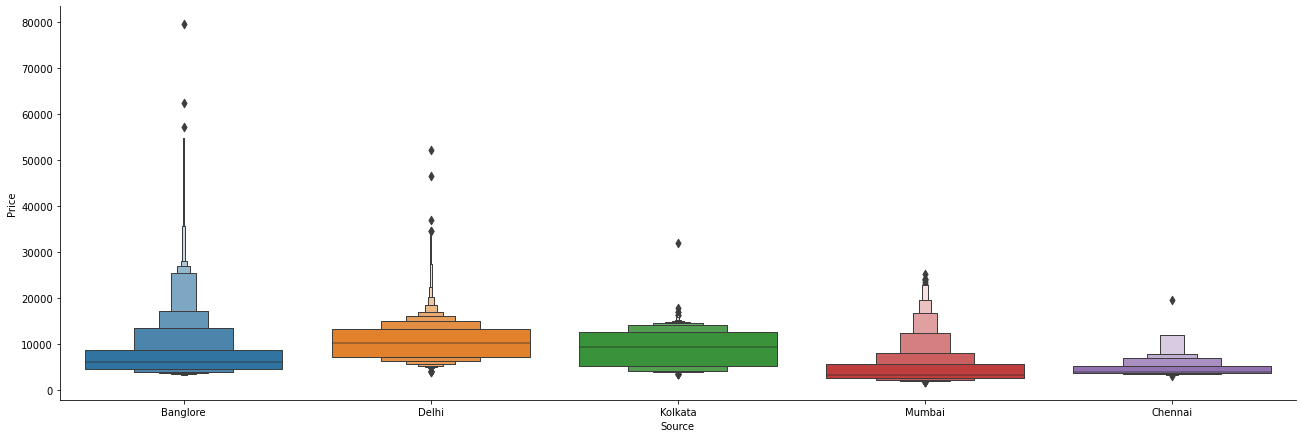

In [190]:
#Source vs Price

sns.catplot(y = "Price", x = "Source", data = Train.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [191]:
# As Source is nominal we will use onehot encoding

Source = Train[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [192]:
Train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [193]:
# As Destination is nominal we will use onehot encoding

Destination = Train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [194]:
Train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [195]:
# Route and total stops are related to each other
# More than 80% info is missing from Additional_info
Train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [196]:
Train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [197]:
# this is the case of ordinal category type hence we will use LabelEncoder

Train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [198]:
# concatenate all the encoded columns to our dataframe

data_train = pd.concat([Train, Airline, Source, Destination], axis = 1)

In [199]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [200]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [201]:
data_train.shape

(10682, 30)

## Test data

In [202]:
Test = pd.read_excel(r"C:\Users\Prince\OneDrive\Documents\Flight Prediction\Test_set.xlsx") # test dataset

In [203]:
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [204]:
Test["Journey_day"] = pd.to_datetime(Test.Date_of_Journey, format = "%d/%m/%Y").dt.day
Test["Journey_month"] = pd.to_datetime(Test.Date_of_Journey, format = "%d/%m/%Y").dt.month

Test.drop(["Date_of_Journey"], axis = 1, inplace = True) # we don't need this column now

# we need to do the same thing with departure time column
# Extracting hours
Test["Dep_hour"] = pd.to_datetime(Test["Dep_Time"]).dt.hour
# Extracting Minutes
Test["Dep_minutes"] = pd.to_datetime(Test["Dep_Time"]).dt.minute

Test.drop(["Dep_Time"], axis = 1, inplace = True) # we don't need this column now


# we need to do the same thing with Arrival_Time column
# Extracting hours
Test["Arrival_hour"] = pd.to_datetime(Test["Arrival_Time"]).dt.hour
# Extracting Minutes
Test["Arrival_min"] = pd.to_datetime(Test["Arrival_Time"]).dt.minute

Test.drop(["Arrival_Time"], axis = 1, inplace = True) # we don't need this column now

# Time taken by the flight to reach destination is called Duration
# it is a difference between  Departure and Arrival time

# assigning and converting Duration column into list
duration = list(Test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour
duration_hour = []
duration_mins = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # Extract only minutes from Duration
    
    # Adding duration_hours and duration_mins list to Train dataframe

Test["Duration_hours"] = duration_hour
Test["Duration_mins"] = duration_mins

Test.drop(["Duration"], axis = 1, inplace = True) # we don't need this column now





Airline = Test[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)


# As Source is nominal we will use onehot encoding

Source = Test[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)




# As Destination is nominal we will use onehot encoding

Destination = Test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)






# Route and total stops are related to each other
# More than 80% info is missing from Additional_info
Test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)



# this is the case of ordinal category type hence we will use LabelEncoder

Test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

# concatenate all the encoded columns to our dataframe

data_test = pd.concat([Test, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1 stop,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,non-stop,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [205]:
X = data_train.drop(columns = ['Price'], axis = 1) # features

In [206]:
y = data_train['Price'] # target variable

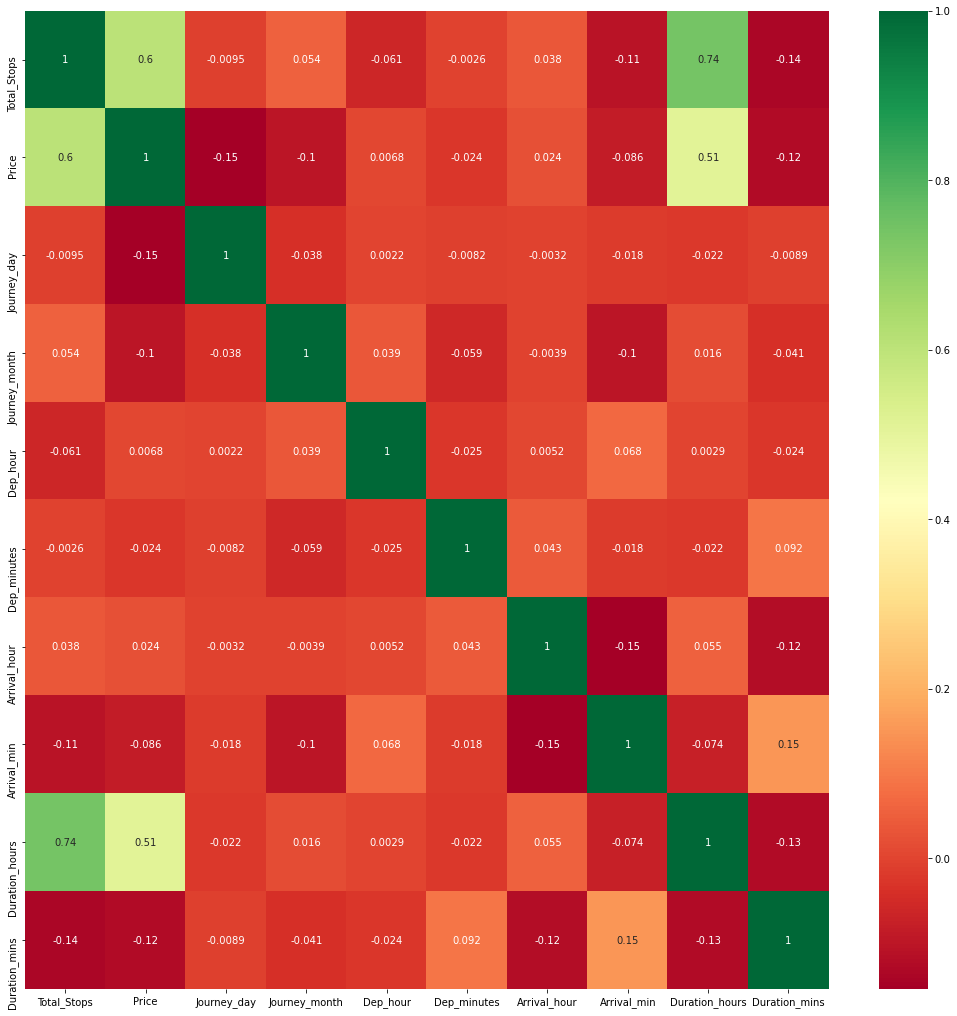

In [207]:
# Finding correlation between features and label

plt.figure(figsize = (18,18))
sns.heatmap(Train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [208]:
# important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

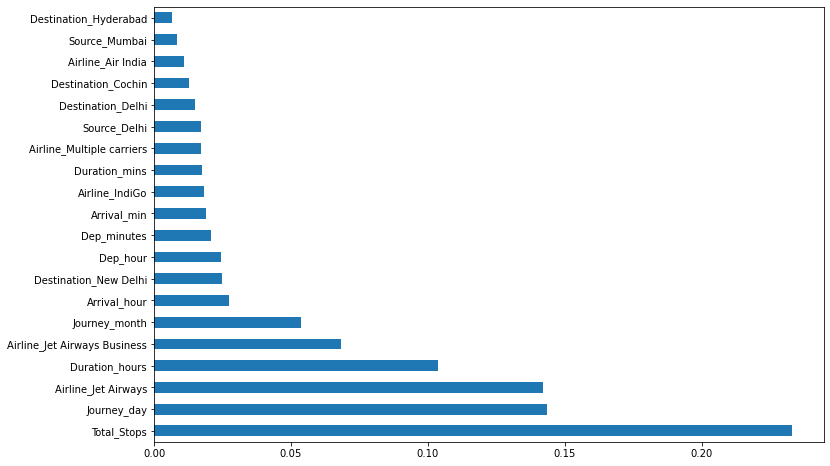

In [209]:
#plotting graph for visualizing feature importance

plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

## Model building

### 1. Linear regression Model

In [232]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [233]:
regression.fit(X_train, y_train) # training our model

LinearRegression()

In [234]:
regression.score(X_train, y_train) # Training score

0.6298854957958571

In [235]:
y_pred_LinearRegression = regression.predict(X_test) # Prediction

In [236]:
regression.score(X_test, y_test)

0.602414230702129

In [237]:
from sklearn import metrics

In [238]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_LinearRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_LinearRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_LinearRegression)))

MAE: 1968.0726523902065
MSE: 8607050.106564058
RMSE: 44.3629648737571


In [239]:
metrics.r2_score(y_test, y_pred_LinearRegression)

0.602414230702129

### 2. Lasso regression model

In [240]:
from sklearn.linear_model import Lasso, LassoCV
lasscv = LassoCV(alphas = None, max_iter =100, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [241]:
alpha = lasscv.alpha_ # Finding alpha
alpha

0.11736085311885068

In [242]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.11736085311885068)

In [243]:
lasso_reg.score(X_train, y_train)

0.6298794988131158

In [244]:
y_pred_LassoRegression = lasso_reg.predict(X_test) # Prediction

In [245]:
lasso_reg.score(X_test, y_test)

0.6024196080087079

In [246]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_LassoRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_LassoRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_LassoRegression)))

MAE: 1967.804880404881
MSE: 8606933.697097884
RMSE: 44.35994680344963


In [247]:
metrics.r2_score(y_test, y_pred_LassoRegression)

0.6024196080087079

### 3. Decision tree model

In [248]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) # Training the model 


DecisionTreeRegressor()

In [249]:
dt.score(X_train, y_train) # scores for training

0.9716600485641411

In [250]:
y_pred_DecisionTree = dt.predict(X_test) # Prediction

In [251]:
dt.score(X_test, y_test)

0.7005036981388224

In [252]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_DecisionTree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_DecisionTree))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_DecisionTree)))

MAE: 1365.582753026332
MSE: 6483581.344981489
RMSE: 36.95379213323488


In [253]:
metrics.r2_score(y_test, y_pred_DecisionTree)

0.7005036981388224

### 4. Random forest model

In [292]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [293]:
rf.score(X_train, y_train) # scores for training

0.9562824816943499

In [294]:
y_pred_RandomForest = rf.predict(X_test) # Prediction

In [295]:
rf.score(X_test, y_test)

0.7883581759718159

In [296]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_RandomForest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_RandomForest))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_RandomForest)))

MAE: 1178.324693472788
MSE: 4581682.556878548
RMSE: 34.32673438404516


In [297]:
metrics.r2_score(y_test, y_pred_RandomForest)

0.7883581759718159

## Hyper-parameter Tuning 

In [298]:
#Randomized searchCV
from sklearn.model_selection import RandomizedSearchCV


#No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#No. of features to be considered at every split
max_features = ['auto', 'sqrt']

#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#Min number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [299]:
#Create a random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [300]:
#Random search of parameters, using 5 fold cross validation, 
#search across 100 different combinations 



rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [301]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [302]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [303]:
predictions = rf_random.predict(X_test)

In [304]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE: 1168.3680516686682
MSE: 4200873.082461811
RMSE: 34.181399205835156


In [305]:
metrics.r2_score(y_test, predictions)

0.8059489214615428

### Let's save our model

In [289]:
import pickle
filename = "Flight_prediction"
pickle.dump(rf_random, open(filename,'wb'))